In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np

In [6]:
data_file=('Cardiac_Outcomes.xlsx')
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']


In [7]:
print(data_file)

Cardiac_Outcomes.xlsx


In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Q 17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [16]:
from datetime import datetime

get_admission_dates = Hospital_data['Admission_date']

nov_cnt = 0

for x in get_admission_dates:
       
    if x.month == 11 :
        nov_cnt += 1  

print(nov_cnt) 


195


In [9]:
import seaborn as sns

# Q 18 Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: >

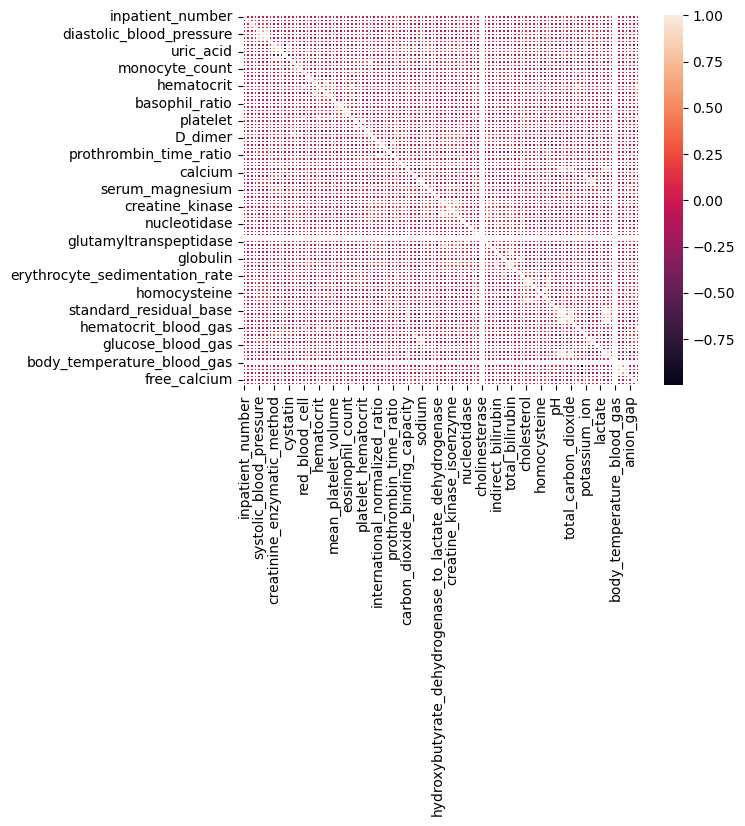

In [10]:
df=pd.DataFrame(lab_data)
sns.heatmap(df.corr(),cbar=True,linewidths=0.2)

In [11]:
import matplotlib.pyplot as plt

# 18 different approach

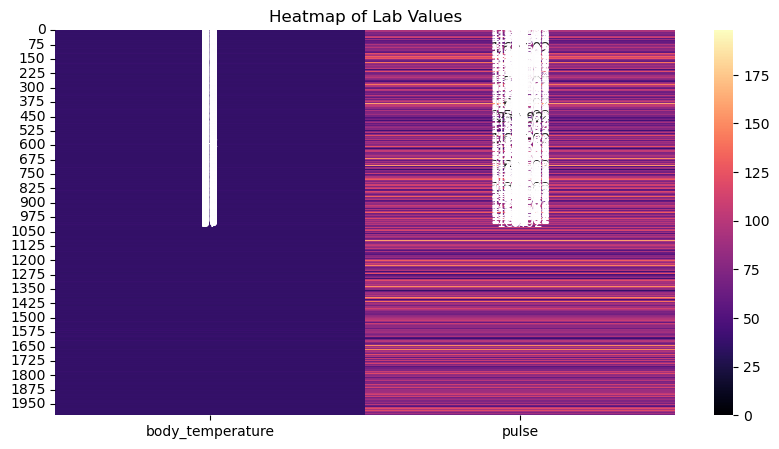

In [15]:
df=pd.DataFrame(lab_data)
heatmap_data = df[['body_temperature', 'pulse']]
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='magma')
plt.title('Heatmap of Lab Values')
plt.show()

# Q 19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method  
 

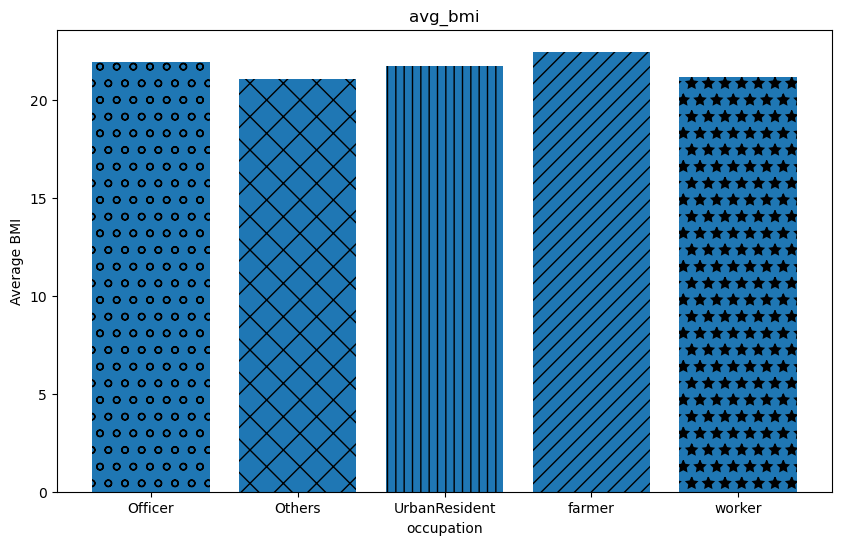

In [13]:
df1=pd.DataFrame(Demography_data)

# Calculate average BMI and occupation
avg_bmi = df1.groupby(['occupation'])['BMI'].mean().reset_index()

average_bmi = df1['BMI'].mean()
# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_bmi['occupation'],avg_bmi ['BMI'])

# Add hatch patterns to bars
hatches = ['o', 'x', '||', '//', '*']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel('occupation')
plt.ylabel('Average BMI')
plt.title('avg_bmi')
plt.show()

# Q 20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n .Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. x=1, y=1, z=2, n=3


In [14]:
x = int(input())
y = int(input())
z = int(input())
n = int(input())
arr=[[i,j,k] for i in range(x+1) for j in range(y+1) for k in range(z+1) if i+j+k !=n]
print(arr)

1
1
2
3
[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


# Q 42 np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. When the value is less than 9, print as 0,else print 1

In [18]:
import numpy as np

arr = np.arange(1,21).reshape(4,5)

# Get the elements 1, 2, 8, and 19
#elements = arr[(0, 0, 1, 2), (0, 1, 3, 3)]
elements1=arr[(0,0)]
element2=arr[(0,1)]
element8=arr[(1,2)]
element19=arr[(3,3)]

# Apply condition to print 0 if value < 9, else print 1
r1 = np.where(elements1 < 9, 0, 1) 
r2=np.where(element2<9,0,1)
r3=np.where(element8 < 9, 0, 1)
r4=np.where(element19 < 9, 0, 1)

print("Original array:")
print(arr)
print("\nElements 1, 2, 8, and 19:")
print(elements1,element2,element8,element19)
print("\nResult with condition:")
print(r1,r2,r3,r4)

Original array:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

Elements 1, 2, 8, and 19:
1 2 8 19

Result with condition:
0 0 0 1


# Q 74 Which adm ward had the lowest rate of Outcome Death?

In [17]:
dead_data = Hospital_data[Hospital_data['outcome_during_hospitalization'] == 'Dead']
patient_nos = dead_data['inpatient_number']
print(dead_data['admission_ward'].value_counts().sort_values())

print(len(dead_data))

admission_ward
ICU            1
GeneralWard    1
Others         1
Cardiology     8
Name: count, dtype: int64
11
